### College Basketball:  What do winning teams have in common?

Based on yearly team stats from the past 9.5 years, how accurate can we get in predicting the outcome of a college 
basketball game?  Are there certain statistics that are stronger predicters?  Basically, what are the common signs of
a "Good" team.

### Goal

Come up with a model that will help predict the outcome of march madness games.

### Data 

Kaggle Data: https://www.kaggle.com/c/mens-machine-learning-competition-2018/data

Website Data: https://www.sports-reference.com/cbb/seasons/2019-school-stats.html

### Import Pacakges

In [6]:
from bs4 import BeautifulSoup
import urllib.request

from selenium import webdriver
import numpy as np
import matplotlib.pyplot as plt
SMALL_SIZE = 5
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('font', size=SMALL_SIZE)        
plt.rc('axes', titlesize=SMALL_SIZE)   
plt.rc('axes', labelsize=SMALL_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)   


from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import seaborn as sns
from time import sleep
import warnings;
warnings.filterwarnings('ignore');
%matplotlib inline

### Getting  and Cleaning Data

In [7]:
# ## Scraping Data from Sports-Reference site


# ## Input years that I want the data for
# years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

# ## path for the Chrome Driver you need to scrape
# driver = webdriver.Chrome(executable_path='C:/Users/rburigo/Desktop/chromedriver.exe')

# ## creating lists for each stat
# wins = []
# losses = []
# srs = []
# sos = []
# conf_wins = []
# conf_losses = []
# home_wins = []
# home_losses = []
# away_wins = []
# away_losses = []
# tot_points = []
# opponent_points = []
# min_played = []
# fg_made = []
# fg_att = []
# three_fg_made = []
# three_fg_att = []
# fthrows_made = []
# fthrows_att = []
# off_rebs = []
# tot_rebs = []
# assts = []
# stls = []
# blks = []
# tovs = []
# pfs = []
# season = []
# master_schools = []

# ## for each year, scraping the data requested and adding it to the corresponding list.
# for year in years:
    
#     schools = []
    
#     url = 'https://www.sports-reference.com/cbb/seasons/{}-school-stats.html'.format(year)
#     driver.get(url)

#     sleep(1)

#     html  = driver.page_source
#     html = BeautifulSoup(html)


#     # wins/season
#     for w in html.find_all('td', {'class':'right', 'data-stat':'wins'}):
#         wins.append(w.text)
#         season.append(year)

#     # losses
#     for l in html.find_all('td', {'class':'right', 'data-stat':'losses'}):
#         losses.append(l.text)
        
#     # srs
#     for sr in html.find_all('td', {'class':'right', 'data-stat':'srs'}):
#         srs.append(sr.text)

#     # sos
#     for so in html.find_all('td', {'class':'right', 'data-stat':'sos'}):
#         sos.append(so.text)

#     # conf. wins
#     for cw in html.find_all('td', {'class':'right', 'data-stat':'wins_conf'}):
#         conf_wins.append(cw.text)
        
#     # conf losses
#     for cl in html.find_all('td', {'class':'right', 'data-stat':'losses_conf'}):
#         conf_losses.append(cl.text)
        
#     # home wins
#     for hw in html.find_all('td', {'class':'right', 'data-stat':'wins_home'}):
#         home_wins.append(hw.text)
        
#     # home losses
#     for hl in html.find_all('td', {'class':'right', 'data-stat':'losses_home'}):
#         home_losses.append(hl.text)
        
#     # away wins
#     for aw in html.find_all('td', {'class':'right', 'data-stat':'wins_visitor'}):
#         away_wins.append(aw.text)

#     # away losses
#     for al in html.find_all('td', {'class':'right', 'data-stat':'losses_visitor'}):
#         away_losses.append(al.text)
        
#     # team points
#     for tp in html.find_all('td', {'class':'right', 'data-stat':'pts'}):
#         tot_points.append(tp.text)
        
#     # opponent points
#     for op in html.find_all('td', {'class':'right', 'data-stat':'opp_pts'}):
#         opponent_points.append(op.text)
        
#     # minutes played
#     for mp in html.find_all('td', {'class':'right', 'data-stat':'mp'}):
#         min_played.append(mp.text)
        
#     # fg made 
#     for fgm in html.find_all('td', {'class':'right', 'data-stat':'fg'}):
#         fg_made.append(fgm.text)
        
#     # fg attempted
#     for fga in html.find_all('td', {'class':'right', 'data-stat':'fga'}):
#         fg_att.append(fga.text)
        
#     # 3 pt made
#     for tfg in html.find_all('td', {'class':'right', 'data-stat':'fg3'}):
#         three_fg_made.append(tfg.text)
        
#     # 3 pt fg attempted
#     for tfga in html.find_all('td', {'class':'right', 'data-stat':'fg3a'}):
#         three_fg_att.append(tfga.text)
        
#     # free throws made
#     for ft in html.find_all('td', {'class':'right', 'data-stat':'ft'}):
#         fthrows_made.append(ft.text)

#     # free throws attempted
#     for fta in html.find_all('td', {'class':'right', 'data-stat':'fta'}):
#         fthrows_att.append(fta.text)
        
#     # offensive rebounds
#     for ob in html.find_all('td', {'class':'right', 'data-stat':'orb'}):
#         off_rebs.append(ob.text)
        
#     # total rebounds
#     for tr in html.find_all('td', {'class':'right', 'data-stat':'trb'}):
#         tot_rebs.append(tr.text)

#     # assists
#     for a in html.find_all('td', {'class':'right', 'data-stat':'ast'}):
#         assts.append(a.text)

#     # turnovers
#     for to in html.find_all('td', {'class':'right', 'data-stat':'tov'}):
#         tovs.append(to.text)
        
#     # personal fouls
#     for f in html.find_all('td', {'class':'right', 'data-stat':'pf'}):
#         pfs.append(f.text)
        
#     # blocks
#     for b in html.find_all('td', {'class':'right', 'data-stat':'blk'}):
#         blks.append(b.text)

#     # schools
#     for name in html.find_all('td', {'class': 'left', 'data-stat':'school_name'}):
#         schools.append(name.find('a').text)

#     # getting rid of duplicate school names
#     for i in set(schools):
#         schools.remove(i)

#     master_schools.extend(s for s in schools)


# ## Forming dataframe
# data = {'School': master_schools, 'Season': season, 'Wins': wins, 'Losses': losses,
#         'SRS': srs, 'SOS': sos, 'conf_wins': conf_wins,
#         'conf_losses': conf_losses, 'home_wins': home_wins,
#         'home_losses': home_losses, 'away_wins': away_wins,
#          'away_losses':away_losses, 'total_points': tot_points,
#         'opponent_points': opponent_points, 'minutes_played':min_played,
#         'field_goals_made': fg_made, 'field_goals_attempted': fg_att,
#        'three_pt_fg_made': three_fg_made, 'three_pt_fg_att': three_fg_att,
#        'free_throws_made': fthrows_made, 'free_throws_att': fthrows_att,
#        'offensive_rebs' : off_rebs, 'total_rebs': tot_rebs, 
#        'assists': assts, 'turnovers':tovs, 'blocks': blks, 'fouls': pfs}

# Team_Stats = pd.DataFrame(data)

In [8]:
# ## reordering columns to get more natural order
# Column_order = ['School','Season','Wins','Losses','SRS','SOS','conf_wins','conf_losses','home_wins','home_losses',
#                 'away_wins','away_losses','total_points','opponent_points','minutes_played','field_goals_made',
#                 'field_goals_attempted','three_pt_fg_made','three_pt_fg_att','free_throws_made','free_throws_att',
#                 'offensive_rebs','total_rebs','assists','turnovers','blocks','fouls']
# Team_Stats = Team_Stats.reindex(columns=Column_order)
# Team_Stats.head()

# ## Saving to csv 
# Team_Stats.to_csv('Team_Stats.csv')

In [9]:
## reading in dataset for each game

RegSeasonGames = pd.read_csv('../Project_4_Stuff/Team_Data/RegularSeasonDetailedResults.csv', sep = ',')
RegSeasonGames.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [10]:
## reading in data set to match teams with respoective IDs

Teams = pd.read_csv('../Project_4_Stuff/Team_Data/Teams.csv', sep = ',')
Teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2019
1,1102,Air Force,1985,2019
2,1103,Akron,1985,2019
3,1104,Alabama,1985,2019
4,1105,Alabama A&M,2000,2019


In [11]:
## reading in data set to match teams with conferences.  Will use this for power 6 conference teams

Conference = pd.read_csv('../Project_4_Stuff/Team_Data/TeamConferences.csv', sep = ',')
Conference.head()

,Season,TeamID,ConfAbbrev
0,1985,1114,a_sun
1,1985,1147,a_sun
2,1985,1204,a_sun
3,1985,1209,a_sun
4,1985,1215,a_sun


In [12]:
## reading in the Team_Stats data that I scraped and put as a csv.  This saves time

Team_Stats = pd.read_csv('../Project_4_Stuff/Team_Data/Team_Stats.csv', sep = ',')
Team_Stats = Team_Stats.drop('Unnamed: 0', 1)
Team_Stats.head()

,School,Season,Wins,Losses,SRS,SOS,conf_wins,conf_losses,home_wins,home_losses,away_wins,away_losses,total_points,opponent_points,minutes_played,field_goals_made,field_goals_attempted,three_pt_fg_made,three_pt_fg_att,free_throws_made,free_throws_att,offensive_rebs,total_rebs,assists,turnovers,blocks,fouls
0,Air Force,2010,10,21,-4.90,3.13,1.0,15.0,8,10,0,10,1773,1957,1240,632,1428,176,562,333,524,220,851,389,394,51,547
1,Akron,2010,24,11,2.82,-1.50,12.0,4.0,13,5,7,4,2472,2293,1430,877,2024,235,694,483,735,467,1269,473,464,114,682
2,Alabama A&M,2010,11,16,-20.19,-13.71,8.0,10.0,8,5,3,9,1778,1881,1085,599,1568,108,371,472,743,376,1004,288,444,143,550
3,Alabama-Birmingham,2010,25,9,9.46,2.90,11.0,5.0,14,4,9,4,2276,2053,1370,763,1806,177,569,573,826,420,1248,390,451,91,611
4,Alabama State,2010,16,15,-14.41,-12.02,12.0,6.0,9,3,6,11,1998,2043,1245,667,1651,190,587,474,739,400,1101,400,501,129,634


In [13]:
##Cleaning up School Names So I can match to the Team_Names document and get a Team ID.
## This function will take in a dataframe and in the school column make adjustments if any.

def Stats_to_Team(df):
    df['School'] = df['School'].replace('(State)', 'St', regex=True) 
    df['School'] = df['School'].replace('Albany (NY)', 'Albany NY') 
    df['School'] = df['School'].replace('Boston University', 'Boston Univ')
    df['School'] = df['School'].replace('Central Michigan', 'C Michigan')
    df['School'] = df['School'].replace('(Eastern)', 'E', regex=True)
    df['School'] = df['School'].replace('Louisiana St', 'LSU')
    df['School'] = df['School'].replace('North Carolina St', 'NC State')
    df['School'] = df['School'].replace('Southern California', 'USC')
    df['School'] = df['School'].replace('University of California', 'California', regex=True) 
    df['School'] = df['School'].replace('American', 'American Univ')
    df['School'] = df['School'].replace('Little Rock', 'Ark Little Rock')
    df['School'] = df['School'].replace('Arkansas-Pine Bluff', 'Ark Pine Bluff')
    df['School'] = df['School'].replace('Bowling Green St', 'Bowling Green')
    df['School'] = df['School'].replace('Brigham Young', 'BYU')
    df['School'] = df['School'].replace('Cal Poly', 'Cal Poly SLO')
    df['School'] = df['School'].replace('Centenary (LA)', 'Centenary')
    df['School'] = df['School'].replace('Central Connecticut St', 'Central Conn')
    df['School'] = df['School'].replace('Charleston Southern', 'Charleston So')
    df['School'] = df['School'].replace('Coastal Carolina', 'Coastal Car')
    df['School'] = df['School'].replace('College of Charleston', 'Col Charleston')
    df['School'] = df['School'].replace('Cal St Fullerton', 'CS Fullerton')
    df['School'] = df['School'].replace('Cal St Bakersfield', 'CS Bakersfield')
    df['School'] = df['School'].replace('Cal St Northridge', 'CS Northridge')
    df['School'] = df['School'].replace('California Baptist', 'Cal Baptist')
    df['School'] = df['School'].replace('East Tennessee St', 'ETSU')
    df['School'] = df['School'].replace('Detroit Mercy', 'Detroit')
    df['School'] = df['School'].replace('Omaha', 'NE Omaha')
    df['School'] = df['School'].replace('Fairleigh Dickinson', 'F Dickinson')
    df['School'] = df['School'].replace('Florida Atlantic', 'FL Atlantic')
    df['School'] = df['School'].replace('Florida Gulf Coast', 'FL Gulf Coast')
    df['School'] = df['School'].replace('Florida International', 'Florida Intl')
    df['School'] = df['School'].replace('Fort Wayne', 'IPFW')
    df['School'] = df['School'].replace('Purdue-Fort Wayne', 'IPFW')
    df['School'] = df['School'].replace('George Washington', 'G Washington')
    df['School'] = df['School'].replace('Georgia Southern', 'Ga Southern')
    df['School'] = df['School'].replace('Gardner-Webb', 'Gardner Webb')
    df['School'] = df['School'].replace('Illinois-Chicago', 'IL Chicago')
    df['School'] = df['School'].replace('Kent St', 'Kent')
    df['School'] = df['School'].replace('Kennesaw St', 'Kennesaw')
    df['School'] = df['School'].replace('Long Island University', 'Long Island')
    df['School'] = df['School'].replace('Loyola Marymount', 'Loy Marymount')
    df['School'] = df['School'].replace('Loyola (MD)', 'Loyola MD')
    df['School'] = df['School'].replace('Loyola (IL)', 'Loyola-Chicago')
    df['School'] = df['School'].replace('Massachusetts', 'Massachusetts')
    df['School'] = df['School'].replace('Maryland-Eastern Shore', 'MD E Shore')
    df['School'] = df['School'].replace('Middle Tennessee', 'MTSU')
    df['School'] = df['School'].replace('Miami (FL)', 'Miami FL')
    df['School'] = df['School'].replace('Miami (OH)', 'Miami OH')
    df['School'] = df['School'].replace('Missouri-Kansas City', 'Missouri KC')
    df['School'] = df['School'].replace('Monmouth', 'Monmouth NJ')
    df['School'] = df['School'].replace('Mississippi Valley St', 'MS Valley St')
    df['School'] = df['School'].replace('Montana St', 'MTSU')
    df['School'] = df['School'].replace('Northern Colorado', 'N Colorado')
    df['School'] = df['School'].replace('North Dakota St', 'N Dakota St')
    df['School'] = df['School'].replace('Northern Illinois', 'N Illinois')
    df['School'] = df['School'].replace('Northern Kentucky', 'N Kentucky')
    df['School'] = df['School'].replace('Northwestern St', 'Northwestern LA')
    df['School'] = df['School'].replace('North Carolina A&T', 'NC A&T')
    df['School'] = df['School'].replace('North Carolina Central', 'NC Central')
    df['School'] = df['School'].replace('Pennsylvania', 'Penn')
    df['School'] = df['School'].replace('Sacramento St', 'CS Sacramento')
    df['School'] = df['School'].replace('South Carolina St', 'S Carolina St')
    df['School'] = df['School'].replace('Southern Illinois', 'S Illinois')
    df['School'] = df['School'].replace('UC-Santa Barbara', 'Santa Barbara')
    df['School'] = df['School'].replace('Southeastern Louisiana', 'SE Louisiana')
    df['School'] = df['School'].replace('Southeast Missouri St', 'SE Missouri St')
    df['School'] = df['School'].replace('Stephen F. Austin', 'SF Austin')
    df['School'] = df['School'].replace('Southern Methodist', 'SMU')
    df['School'] = df['School'].replace('Southern Mississippi', 'Southern Miss')
    df['School'] = df['School'].replace('Southern', 'Southern Univ')
    df['School'] = df['School'].replace('St. Bonaventure', 'St Bonaventure')
    df['School'] = df['School'].replace('St. Francis (NY)', 'St Francis NY')
    df['School'] = df['School'].replace('Saint Francis (PA)', 'St Francis PA')
    df['School'] = df['School'].replace('St. John\'s (NY)', 'St John\'s')
    df['School'] = df['School'].replace('Saint Joseph\'s', 'St Joseph\'s PA')
    df['School'] = df['School'].replace('Saint Louis', 'St Louis')
    df['School'] = df['School'].replace('Saint Mary\'s (CA)', 'St Mary\'s CA')
    df['School'] = df['School'].replace('Mount St. Mary\'s', 'Mt St Mary\'s')
    df['School'] = df['School'].replace('Saint Peter\'s', 'St Peter\'s')
    df['School'] = df['School'].replace('SIU Edwardsville', 'Edwardsville')
    df['School'] = df['School'].replace('South Carolina Upstate', 'SC Upstate')
    df['School'] = df['School'].replace('Texas A&M-Corpus Christi', 'TAM C. Christi')
    df['School'] = df['School'].replace('Texas Christian', 'TCU')
    df['School'] = df['School'].replace('Tennessee-Martin', 'TN Martin')
    df['School'] = df['School'].replace('Texas-Rio Grande Valley', 'UTRGV')
    df['School'] = df['School'].replace('Texas Southern', 'TX Southern')
    df['School'] = df['School'].replace('Alabama-Birmingham', 'UAB')
    df['School'] = df['School'].replace('UC-Davis', 'UC Davis')
    df['School'] = df['School'].replace('UC-Irvine', 'UC Irvine')
    df['School'] = df['School'].replace('UC-Riverside', 'UC Riverside')
    df['School'] = df['School'].replace('Central Florida', 'UCF')
    df['School'] = df['School'].replace('Louisiana-Lafayette', 'ULL')
    df['School'] = df['School'].replace('Louisiana-Monroe', 'ULM')
    df['School'] = df['School'].replace('Maryland-Baltimore County', 'UMBC')
    df['School'] = df['School'].replace('South Carolina Upstate', 'SC Upstate')
    df['School'] = df['School'].replace('Texas A&M-Corpus Christi', 'TAM C. Christi')
    df['School'] = df['School'].replace('Texas Christian', 'TCU')
    df['School'] = df['School'].replace('Tennessee-Martin', 'TN Martin')
    df['School'] = df['School'].replace('Texas-Rio Grande Valley', 'UTRGV')
    df['School'] = df['School'].replace('Texas Southern', 'TX Southern')
    df['School'] = df['School'].replace('Alabama-Birmingham', 'UAB')
    df['School'] = df['School'].replace('UC-Davis', 'UC Davis')
    df['School'] = df['School'].replace('UC-Irvine', 'UC Irvine')
    df['School'] = df['School'].replace('UC-Riverside', 'UC Riverside')
    df['School'] = df['School'].replace('Central Florida', 'UCF')
    df['School'] = df['School'].replace('Louisiana-Lafayette', 'ULL')
    df['School'] = df['School'].replace('Louisiana-Monroe', 'ULM')
    df['School'] = df['School'].replace('Maryland-Baltimore County', 'UMBC')
    df['School'] = df['School'].replace('Massachusetts-Lowell', 'MA Lowell')
    df['School'] = df['School'].replace('South Carolina Upstate', 'SC Upstate')
    df['School'] = df['School'].replace('Texas A&M-Corpus Christi', 'TAM C. Christi')
    df['School'] = df['School'].replace('Texas Christian', 'TCU')
    df['School'] = df['School'].replace('Tennessee-Martin', 'TN Martin')
    df['School'] = df['School'].replace('Texas-Rio Grande Valley', 'UTRGV')
    df['School'] = df['School'].replace('Texas Southern', 'TX Southern')
    df['School'] = df['School'].replace('Alabama-Birmingham', 'UAB')
    df['School'] = df['School'].replace('UC-Davis', 'UC Davis')
    df['School'] = df['School'].replace('UC-Irvine', 'UC Irvine')
    df['School'] = df['School'].replace('UC-Riverside', 'UC Riverside')
    df['School'] = df['School'].replace('Central Florida', 'UCF')
    df['School'] = df['School'].replace('Louisiana-Lafayette', 'ULL')
    df['School'] = df['School'].replace('Louisiana-Monroe', 'ULM')
    df['School'] = df['School'].replace('Maryland-Baltimore County', 'UMBC')
    df['School'] = df['School'].replace('North Carolina-Asheville', 'UNC Asheville')
    df['School'] = df['School'].replace('North Carolina-Greensboro', 'UNC Greensboro')
    df['School'] = df['School'].replace('North Carolina-Wilmington', 'UNC Wilmington')
    df['School'] = df['School'].replace('Nevada-Las Vegas', 'UNLV')
    df['School'] = df['School'].replace('Texas-Arlington', 'UT Arlington')
    df['School'] = df['School'].replace('Texas-San Antonio', 'UT San Antonio')
    df['School'] = df['School'].replace('Texas-El Paso', 'UTEP')
    df['School'] = df['School'].replace('Virginia Commonwealth', 'VA Commonwealth')
    df['School'] = df['School'].replace('Western Carolina', 'W Carolina')
    df['School'] = df['School'].replace('Western Illinois', 'W Illinois')
    df['School'] = df['School'].replace('Milwaukee', 'WI Milwaukee')
    df['School'] = df['School'].replace('Louisiana', 'ULL')
    df['School'] = df['School'].replace('Green Bay', 'WI Green Bay')
    df['School'] = df['School'].replace('Western Kentucky', 'WKU')
    df['School'] = df['School'].replace('Western Michigan', 'W Michigan')
    df['School'] = df['School'].replace('Abilene Christian', 'Abilene Chr')
    df['School'] = df['School'].replace('Montana State', 'Montana St')
    df['School'] = df['School'].replace('Central Arkansas', 'Cent Arkansas')
    df['School'] = df['School'].replace('Houston Baptist', 'Houston Bap')
    df['School'] = df['School'].replace('South Dakota St', 'S Dakota St')
    df['School'] = df['School'].replace('Maryland-E Shore', 'MD E Shore')
    return df

Stats_to_Team(Team_Stats)

,School,Season,Wins,Losses,SRS,SOS,conf_wins,conf_losses,home_wins,home_losses,away_wins,away_losses,total_points,opponent_points,minutes_played,field_goals_made,field_goals_attempted,three_pt_fg_made,three_pt_fg_att,free_throws_made,free_throws_att,offensive_rebs,total_rebs,assists,turnovers,blocks,fouls
0,Air Force,2010,10,21,-4.90,3.13,1.0,15.0,8,10,0,10,1773,1957,1240,632,1428,176,562,333,524,220,851,389,394,51,547
1,Akron,2010,24,11,2.82,-1.50,12.0,4.0,13,5,7,4,2472,2293,1430,877,2024,235,694,483,735,467,1269,473,464,114,682
2,Alabama A&M,2010,11,16,-20.19,-13.71,8.0,10.0,8,5,3,9,1778,1881,1085,599,1568,108,371,472,743,376,1004,288,444,143,550
3,UAB,2010,25,9,9.46,2.90,11.0,5.0,14,4,9,4,2276,2053,1370,763,1806,177,569,573,826,420,1248,390,451,91,611
4,Alabama St,2010,16,15,-14.41,-12.02,12.0,6.0,9,3,6,11,1998,2043,1245,667,1651,190,587,474,739,400,1101,400,501,129,634
5,Alabama,2010,17,15,10.34,6.62,6.0,10.0,11,6,3,6,2192,2073,1280,791,1794,175,500,435,615,386,1126,429,410,127,583
6,Albany NY,2010,7,25,-11.94,-5.53,2.0,14.0,4,9,3,15,2007,2212,1290,710,1736,194,585,393,545,399,1156,380,517,97,602
7,Alcorn St,2010,2,29,-30.36,-9.00,2.0,16.0,2,8,0,18,1880,2542,1245,651,1717,135,437,443,725,356,1065,269,642,98,670
8,American Univ,2010,11,20,-11.47,-6.89,7.0,7.0,7,8,4,12,1941,2083,1265,681,1603,184,534,395,571,304,1097,447,458,81,590
9,Appalachian St,2010,24,13,1.80,-2.76,13.0,5.0,14,4,8,8,2766,2567,1490,954,2006,279,703,579,785,411,1424,447,544,102,652


In [14]:
## Here I am adding the TeamID column from the "Team" DataFrame to the Team_Stats DataFrame.  I need this ID to 
## link to the other data frames. 

Team_Stats=Team_Stats.merge(Teams[['TeamID', 'TeamName']], left_on='School', right_on='TeamName', how='left')
Team_Stats.head()

,School,Season,Wins,Losses,SRS,SOS,conf_wins,conf_losses,home_wins,home_losses,away_wins,away_losses,total_points,opponent_points,minutes_played,field_goals_made,field_goals_attempted,three_pt_fg_made,three_pt_fg_att,free_throws_made,free_throws_att,offensive_rebs,total_rebs,assists,turnovers,blocks,fouls,TeamID,TeamName
0,Air Force,2010,10,21,-4.90,3.13,1.0,15.0,8,10,0,10,1773,1957,1240,632,1428,176,562,333,524,220,851,389,394,51,547,1102,Air Force
1,Akron,2010,24,11,2.82,-1.50,12.0,4.0,13,5,7,4,2472,2293,1430,877,2024,235,694,483,735,467,1269,473,464,114,682,1103,Akron
2,Alabama A&M,2010,11,16,-20.19,-13.71,8.0,10.0,8,5,3,9,1778,1881,1085,599,1568,108,371,472,743,376,1004,288,444,143,550,1105,Alabama A&M
3,UAB,2010,25,9,9.46,2.90,11.0,5.0,14,4,9,4,2276,2053,1370,763,1806,177,569,573,826,420,1248,390,451,91,611,1412,UAB
4,Alabama St,2010,16,15,-14.41,-12.02,12.0,6.0,9,3,6,11,1998,2043,1245,667,1651,190,587,474,739,400,1101,400,501,129,634,1106,Alabama St


In [15]:
## Checking to see if there are any columns with null values.
## There are 8 rows with null values in the "conf_wins" and "conf_losses" columns.  I noticed that this was incomplete
## data at the source so I am going to drop the rows.

Team_Stats.isnull().sum()

School                   0
Season                   0
Wins                     0
Losses                   0
SRS                      0
SOS                      0
conf_wins                8
conf_losses              8
home_wins                0
home_losses              0
away_wins                0
away_losses              0
total_points             0
opponent_points          0
minutes_played           0
field_goals_made         0
field_goals_attempted    0
three_pt_fg_made         0
three_pt_fg_att          0
free_throws_made         0
free_throws_att          0
offensive_rebs           0
total_rebs               0
assists                  0
turnovers                0
blocks                   0
fouls                    0
TeamID                   0
TeamName                 0
dtype: int64

In [16]:
## checking the shape of the database before i drop

Team_Stats.shape

(3478, 29)

In [17]:
## dropping any rows that have a null value and inplace=True so my DataFrame saves.

Team_Stats.dropna(inplace=True)

In [18]:
## checking to make sure there are no more nulls

Team_Stats.isnull().sum()

School                   0
Season                   0
Wins                     0
Losses                   0
SRS                      0
SOS                      0
conf_wins                0
conf_losses              0
home_wins                0
home_losses              0
away_wins                0
away_losses              0
total_points             0
opponent_points          0
minutes_played           0
field_goals_made         0
field_goals_attempted    0
three_pt_fg_made         0
three_pt_fg_att          0
free_throws_made         0
free_throws_att          0
offensive_rebs           0
total_rebs               0
assists                  0
turnovers                0
blocks                   0
fouls                    0
TeamID                   0
TeamName                 0
dtype: int64

In [19]:
## checking that i have 8 less rows than my previous shape.  3478 vs 3470. This checks out. 

Team_Stats.shape

(3470, 29)

In [20]:
## attach conferences to each of the Teams.  I will use this to designate "Power 6" conferences.  A data point i want
## to test.

Team_Stats = pd.merge(Team_Stats, Conference,  how='left', left_on=['TeamID','Season'], right_on = ['TeamID','Season'])

Team_Stats.head()

,School,Season,Wins,Losses,SRS,SOS,conf_wins,conf_losses,home_wins,home_losses,away_wins,away_losses,total_points,opponent_points,minutes_played,field_goals_made,field_goals_attempted,three_pt_fg_made,three_pt_fg_att,free_throws_made,free_throws_att,offensive_rebs,total_rebs,assists,turnovers,blocks,fouls,TeamID,TeamName,ConfAbbrev
0,Air Force,2010,10,21,-4.90,3.13,1.0,15.0,8,10,0,10,1773,1957,1240,632,1428,176,562,333,524,220,851,389,394,51,547,1102,Air Force,mwc
1,Akron,2010,24,11,2.82,-1.50,12.0,4.0,13,5,7,4,2472,2293,1430,877,2024,235,694,483,735,467,1269,473,464,114,682,1103,Akron,mac
2,Alabama A&M,2010,11,16,-20.19,-13.71,8.0,10.0,8,5,3,9,1778,1881,1085,599,1568,108,371,472,743,376,1004,288,444,143,550,1105,Alabama A&M,swac
3,UAB,2010,25,9,9.46,2.90,11.0,5.0,14,4,9,4,2276,2053,1370,763,1806,177,569,573,826,420,1248,390,451,91,611,1412,UAB,cusa
4,Alabama St,2010,16,15,-14.41,-12.02,12.0,6.0,9,3,6,11,1998,2043,1245,667,1651,190,587,474,739,400,1101,400,501,129,634,1106,Alabama St,swac


In [21]:
## Now attaching the conference to the reg season df for both the winning and losing team

RegSeasonGames = pd.merge(RegSeasonGames, Conference,  how='left', left_on=['WTeamID','Season'], right_on = ['TeamID','Season'])

RegSeasonGames.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,TeamID,ConfAbbrev
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,1104,sec
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,1272,cusa
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,1266,cusa
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,1296,mac
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,1400,big_twelve


In [22]:
## Now adding the losing team conference and adjusting the suffixes

RegSeasonGames = pd.merge(RegSeasonGames, Conference,  how='left', left_on=['LTeamID','Season'], right_on = ['TeamID','Season'],suffixes=('_W','_L'))

RegSeasonGames.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,TeamID_W,ConfAbbrev_W,TeamID_L,ConfAbbrev_L
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,1104,sec,1328,big_twelve
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,1272,cusa,1393,big_east
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,1266,cusa,1437,big_east
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,1296,mac,1457,big_south
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,1400,big_twelve,1208,sec


In [23]:
## i want to now create a new column where there is a 1 if a team is in a p6 conference and a 0 if not.  I am going to
## do this for the Team_Stats df as well as the RegSeasonGames df.

p6 =['big_twelve','acc','big_east','sec','pac_ten','pac_twelve','big_ten']

def power_six(df):
    conf = []
    for ind, row in df.iterrows():        
        if row.ConfAbbrev in p6:
            PowerSix = 1
        else:
            PowerSix = 0
        conf.append(PowerSix)
    
    df['PowerSix'] = conf   
    
    
power_six(Team_Stats)

In [24]:
## checking to make sure the above function added correctly.  It Did. 

Team_Stats

,School,Season,Wins,Losses,SRS,SOS,conf_wins,conf_losses,home_wins,home_losses,away_wins,away_losses,total_points,opponent_points,minutes_played,field_goals_made,field_goals_attempted,three_pt_fg_made,three_pt_fg_att,free_throws_made,free_throws_att,offensive_rebs,total_rebs,assists,turnovers,blocks,fouls,TeamID,TeamName,ConfAbbrev,PowerSix
0,Air Force,2010,10,21,-4.90,3.13,1.0,15.0,8,10,0,10,1773,1957,1240,632,1428,176,562,333,524,220,851,389,394,51,547,1102,Air Force,mwc,0
1,Akron,2010,24,11,2.82,-1.50,12.0,4.0,13,5,7,4,2472,2293,1430,877,2024,235,694,483,735,467,1269,473,464,114,682,1103,Akron,mac,0
2,Alabama A&M,2010,11,16,-20.19,-13.71,8.0,10.0,8,5,3,9,1778,1881,1085,599,1568,108,371,472,743,376,1004,288,444,143,550,1105,Alabama A&M,swac,0
3,UAB,2010,25,9,9.46,2.90,11.0,5.0,14,4,9,4,2276,2053,1370,763,1806,177,569,573,826,420,1248,390,451,91,611,1412,UAB,cusa,0
4,Alabama St,2010,16,15,-14.41,-12.02,12.0,6.0,9,3,6,11,1998,2043,1245,667,1651,190,587,474,739,400,1101,400,501,129,634,1106,Alabama St,swac,0
5,Alabama,2010,17,15,10.34,6.62,6.0,10.0,11,6,3,6,2192,2073,1280,791,1794,175,500,435,615,386,1126,429,410,127,583,1104,Alabama,sec,1
6,Albany NY,2010,7,25,-11.94,-5.53,2.0,14.0,4,9,3,15,2007,2212,1290,710,1736,194,585,393,545,399,1156,380,517,97,602,1107,Albany NY,aec,0
7,Alcorn St,2010,2,29,-30.36,-9.00,2.0,16.0,2,8,0,18,1880,2542,1245,651,1717,135,437,443,725,356,1065,269,642,98,670,1108,Alcorn St,swac,0
8,American Univ,2010,11,20,-11.47,-6.89,7.0,7.0,7,8,4,12,1941,2083,1265,681,1603,184,534,395,571,304,1097,447,458,81,590,1110,American Univ,patriot,0
9,Appalachian St,2010,24,13,1.80,-2.76,13.0,5.0,14,4,8,8,2766,2567,1490,954,2006,279,703,579,785,411,1424,447,544,102,652,1111,Appalachian St,southern,0


In [25]:
## Now adding the if the winning/losing team was in a P6 conference.  First for the winning team.

p6 =['big_twelve','acc','big_east','sec','pac_ten','pac_twelve','big_ten']

def power_six(df):
    conf = []
    for ind, row in df.iterrows():        
        if row.ConfAbbrev_W in p6:
            PowerSix = 1
        else:
            PowerSix = 0
        conf.append(PowerSix)
    
    df['PowerSix_W'] = conf   
    
    
power_six(RegSeasonGames)

In [26]:
## And now for the losing team.

p6 =['big_twelve','acc','big_east','sec','pac_ten','pac_twelve','big_ten']

def power_six(df):
    conf = []
    for ind, row in df.iterrows():        
        if row.ConfAbbrev_L in p6:
            PowerSix = 1
        else:
            PowerSix = 0
        conf.append(PowerSix)
    
    df['PowerSix_L'] = conf   
    
    
power_six(RegSeasonGames)

In [27]:
## Now I am checking to see if i added my columns correctly. 

RegSeasonGames.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,TeamID_W,ConfAbbrev_W,TeamID_L,ConfAbbrev_L,PowerSix_W,PowerSix_L
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,1104,sec,1328,big_twelve,1,1
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,1272,cusa,1393,big_east,0,1
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,1266,cusa,1437,big_east,0,1
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,1296,mac,1457,big_south,0,0
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,1400,big_twelve,1208,sec,1,1


In [28]:
## dropping two columns i don't need from the Team_Stats dataframe. 

Team_Stats=Team_Stats.drop(['TeamName','minutes_played'],axis=1)
Team_Stats.head()

,School,Season,Wins,Losses,SRS,SOS,conf_wins,conf_losses,home_wins,home_losses,away_wins,away_losses,total_points,opponent_points,field_goals_made,field_goals_attempted,three_pt_fg_made,three_pt_fg_att,free_throws_made,free_throws_att,offensive_rebs,total_rebs,assists,turnovers,blocks,fouls,TeamID,ConfAbbrev,PowerSix
0,Air Force,2010,10,21,-4.90,3.13,1.0,15.0,8,10,0,10,1773,1957,632,1428,176,562,333,524,220,851,389,394,51,547,1102,mwc,0
1,Akron,2010,24,11,2.82,-1.50,12.0,4.0,13,5,7,4,2472,2293,877,2024,235,694,483,735,467,1269,473,464,114,682,1103,mac,0
2,Alabama A&M,2010,11,16,-20.19,-13.71,8.0,10.0,8,5,3,9,1778,1881,599,1568,108,371,472,743,376,1004,288,444,143,550,1105,swac,0
3,UAB,2010,25,9,9.46,2.90,11.0,5.0,14,4,9,4,2276,2053,763,1806,177,569,573,826,420,1248,390,451,91,611,1412,cusa,0
4,Alabama St,2010,16,15,-14.41,-12.02,12.0,6.0,9,3,6,11,1998,2043,667,1651,190,587,474,739,400,1101,400,501,129,634,1106,swac,0


In [29]:
## dropping seasons that i will not be looking at from the RegSeason df.

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

RegSeasonGames_p2009 = RegSeasonGames[RegSeasonGames.Season.isin(years)]

RegSeasonGames_p2009.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,TeamID_W,ConfAbbrev_W,TeamID_L,ConfAbbrev_L,PowerSix_W,PowerSix_L
34074,2010,7,1143,75,1293,70,H,0,24,52,5,12,22,32,13,19,15,12,8,1,14,26,52,8,21,10,15,11,20,11,17,7,3,24,1143,pac_ten,1293,ovc,1,0
34075,2010,7,1314,88,1198,72,H,0,34,61,4,13,16,19,12,32,23,26,10,8,19,25,68,8,23,14,17,13,16,15,20,14,2,18,1314,acc,1198,sun_belt,1,0
34076,2010,7,1326,100,1108,60,H,0,39,73,14,33,8,12,13,34,29,6,8,6,19,21,61,7,17,11,20,11,24,7,13,4,5,16,1326,big_ten,1108,swac,1,0
34077,2010,7,1393,75,1107,43,H,0,29,60,2,17,15,31,14,32,21,21,21,6,16,15,55,5,28,8,14,12,27,10,32,12,4,27,1393,big_east,1107,aec,1,0
34078,2010,9,1143,95,1178,61,H,0,29,61,7,17,30,35,15,30,11,10,5,3,20,20,57,4,18,17,27,14,18,14,15,4,2,21,1143,pac_ten,1178,horizon,1,0


In [30]:
## checking the columns.  I correctly added the suffix so i know the correct column for the winning and losing team.

RegSeasonGames_p2009.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'TeamID_W', 'ConfAbbrev_W', 'TeamID_L', 'ConfAbbrev_L', 'PowerSix_W',
       'PowerSix_L'],
      dtype='object')

### More Exploratory Data Analysis (and formatting when necessary)

Now that I have all my data imported and clean, I am going to explore the data as well as consoildate so i can run
some Machine Learning.

In [31]:
## First I want to check if I have any null values.  

RegSeasonGames_p2009.isnull().sum()

Season          0
DayNum          0
WTeamID         0
WScore          0
LTeamID         0
LScore          0
WLoc            0
NumOT           0
WFGM            0
WFGA            0
WFGM3           0
WFGA3           0
WFTM            0
WFTA            0
WOR             0
WDR             0
WAst            0
WTO             0
WStl            0
WBlk            0
WPF             0
LFGM            0
LFGA            0
LFGM3           0
LFGA3           0
LFTM            0
LFTA            0
LOR             0
LDR             0
LAst            0
LTO             0
LStl            0
LBlk            0
LPF             0
TeamID_W        0
ConfAbbrev_W    0
TeamID_L        0
ConfAbbrev_L    0
PowerSix_W      0
PowerSix_L      0
dtype: int64

In [32]:
## Now checking to shape

RegSeasonGames_p2009.shape

(47967, 40)

In [33]:
## Now looking at the index of the dataset to make sure there is none set.

print (RegSeasonGames_p2009.index.name)

None


In [34]:
## The index used will be the default of the dataset as there is not a unique field.
## Now going to look at the Data Types of the dataframe. It is mostly float or int.

pd.DataFrame(RegSeasonGames_p2009.dtypes, columns= ['Data_Types'])

,Data_Types
Season,int64
DayNum,int64
WTeamID,int64
WScore,int64
LTeamID,int64
LScore,int64
WLoc,object
NumOT,int64
WFGM,int64
WFGA,int64


In [35]:
## Using .describe() to get some summary stats on my dataframe.  Can be helpful later on.  Transpose for viewing

RegSeasonGames_p2009.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Season,47967.0,2014.026706,2.581228,2010.0,2012.0,2014.0,2016.0,2018.0
DayNum,47967.0,70.280047,35.853233,4.0,37.0,73.0,101.0,132.0
WTeamID,47967.0,1287.833677,104.280403,1101.0,1199.0,1287.0,1379.0,1464.0
WScore,47967.0,75.579523,11.098497,34.0,68.0,75.0,83.0,144.0
LTeamID,47967.0,1281.088477,103.648696,1101.0,1191.0,1280.0,1371.0,1464.0
LScore,47967.0,63.640628,10.981226,25.0,56.0,63.0,71.0,127.0
NumOT,47967.0,0.075406,0.321642,0.0,0.0,0.0,0.0,5.0
WFGM,47967.0,26.100340,4.677856,10.0,23.0,26.0,29.0,56.0
WFGA,47967.0,55.223091,7.444369,27.0,50.0,55.0,60.0,97.0
WFGM3,47967.0,7.153856,3.102330,0.0,5.0,7.0,9.0,26.0


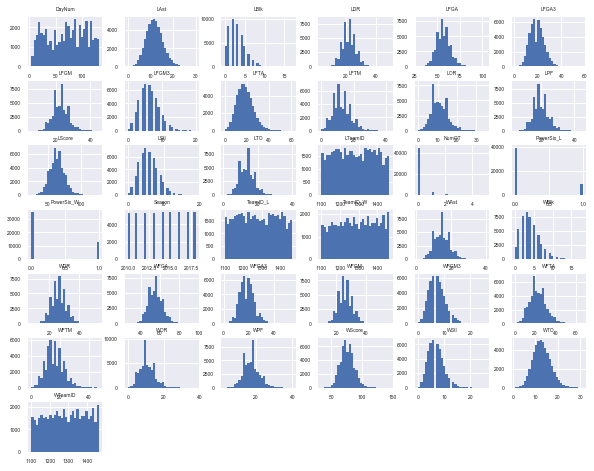

In [36]:
## want to look at the distrobution of the attributes so i know if i am dealing with a skewed or regular distribution.  I would
## like to have regular distribution for my model below.
             
RegSeasonGames_p2009.hist(figsize=(10,8),bins=30);

In [37]:
## The end goal of this is to determine how accurate we can predict a basketball winner.  So out of curiousity i am
## going to look at how each field correlates with the score of the winning team...

RegSeasonGames_p2009[RegSeasonGames_p2009.columns[1:]].corr()['WScore'][::]

DayNum       -0.091221
WTeamID      -0.004061
WScore        1.000000
LTeamID      -0.008782
LScore        0.655165
NumOT         0.142734
WFGM          0.817268
WFGA          0.493697
WFGM3         0.456668
WFGA3         0.283345
WFTM          0.325413
WFTA          0.284098
WOR           0.091225
WDR           0.165745
WAst          0.555359
WTO          -0.033739
WStl          0.103023
WBlk          0.045651
WPF           0.237491
LFGM          0.544330
LFGA          0.425590
LFGM3         0.304204
LFGA3         0.221445
LFTM          0.292901
LFTA          0.273610
LOR           0.060192
LDR          -0.089865
LAst          0.295211
LTO           0.059687
LStl          0.011380
LBlk         -0.054623
LPF           0.241960
TeamID_W     -0.004061
TeamID_L     -0.008782
PowerSix_W    0.080379
PowerSix_L   -0.032113
Name: WScore, dtype: float64

In [38]:
## Now I am going to create some of my own stats.  Essentially i want the percentages of some main stats

RegSeasonGames_p2009['WFT_Pct']= RegSeasonGames_p2009['WFTM'] / RegSeasonGames_p2009['WFTA']
RegSeasonGames_p2009['WFG_Pct']= RegSeasonGames_p2009['WFGM'] / RegSeasonGames_p2009['WFGA']
RegSeasonGames_p2009['WFGM3_Pct']= RegSeasonGames_p2009['WFGM3'] / RegSeasonGames_p2009['WFGA3']
RegSeasonGames_p2009['WA_T_Rat']= RegSeasonGames_p2009['WAst'] / RegSeasonGames_p2009['WTO']
RegSeasonGames_p2009['LFT_Pct']= RegSeasonGames_p2009['LFTM'] / RegSeasonGames_p2009['LFTA']
RegSeasonGames_p2009['LFG_Pct']= RegSeasonGames_p2009['LFGM'] / RegSeasonGames_p2009['LFGA']
RegSeasonGames_p2009['LFGM3_Pct']= RegSeasonGames_p2009['LFGM3'] / RegSeasonGames_p2009['LFGA3']
RegSeasonGames_p2009['LA_T_Rat']= RegSeasonGames_p2009['LAst'] / RegSeasonGames_p2009['LTO']



In [39]:
## Checking to see if all of those fields were added correctly.

RegSeasonGames_p2009.head()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,TeamID_W,ConfAbbrev_W,TeamID_L,ConfAbbrev_L,PowerSix_W,PowerSix_L,WFT_Pct,WFG_Pct,WFGM3_Pct,WA_T_Rat,LFT_Pct,LFG_Pct,LFGM3_Pct,LA_T_Rat
34074,2010,7,1143,75,1293,70,H,0,24,52,5,12,22,32,13,19,15,12,8,1,14,26,52,8,21,10,15,11,20,11,17,7,3,24,1143,pac_ten,1293,ovc,1,0,0.687500,0.461538,0.416667,1.250000,0.666667,0.500000,0.380952,0.647059
34075,2010,7,1314,88,1198,72,H,0,34,61,4,13,16,19,12,32,23,26,10,8,19,25,68,8,23,14,17,13,16,15,20,14,2,18,1314,acc,1198,sun_belt,1,0,0.842105,0.557377,0.307692,0.884615,0.823529,0.367647,0.347826,0.750000
34076,2010,7,1326,100,1108,60,H,0,39,73,14,33,8,12,13,34,29,6,8,6,19,21,61,7,17,11,20,11,24,7,13,4,5,16,1326,big_ten,1108,swac,1,0,0.666667,0.534247,0.424242,4.833333,0.550000,0.344262,0.411765,0.538462
34077,2010,7,1393,75,1107,43,H,0,29,60,2,17,15,31,14,32,21,21,21,6,16,15,55,5,28,8,14,12,27,10,32,12,4,27,1393,big_east,1107,aec,1,0,0.483871,0.483333,0.117647,1.000000,0.571429,0.272727,0.178571,0.312500
34078,2010,9,1143,95,1178,61,H,0,29,61,7,17,30,35,15,30,11,10,5,3,20,20,57,4,18,17,27,14,18,14,15,4,2,21,1143,pac_ten,1178,horizon,1,0,0.857143,0.475410,0.411765,1.100000,0.629630,0.350877,0.222222,0.933333


In [40]:
## To use location in an algorythm i want to give each winning location a value. Home games are 1, Away are -1, and
## neutral games are 0.

location=[]
for ind, row in RegSeasonGames_p2009.iterrows():        
    if row.WLoc =='H':
        Loc = 1
    elif row.WLoc == 'A':
        Loc = -1  
    else:
        Loc = 0
    location.append(Loc)
    
RegSeasonGames_p2009['WLocation'] = location

In [41]:
## I have the location for the winning team, but now i need to make a Losing location.  Essentially i am just 
## doing the inverse of the previous for loop.


location=[]
for ind, row in RegSeasonGames_p2009.iterrows():        
    if row.WLocation == 1:
        Loc = -1
    elif row.WLocation == -1:
        Loc = 1  
    else:
        Loc = 0
    location.append(Loc)
    
RegSeasonGames_p2009['LLocation'] = location

In [42]:
RegSeasonGames_p2009.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,TeamID_W,ConfAbbrev_W,TeamID_L,ConfAbbrev_L,PowerSix_W,PowerSix_L,WFT_Pct,WFG_Pct,WFGM3_Pct,WA_T_Rat,LFT_Pct,LFG_Pct,LFGM3_Pct,LA_T_Rat,WLocation,LLocation
34074,2010,7,1143,75,1293,70,H,0,24,52,5,12,22,32,13,19,15,12,8,1,14,26,52,8,21,10,15,11,20,11,17,7,3,24,1143,pac_ten,1293,ovc,1,0,0.687500,0.461538,0.416667,1.250000,0.666667,0.500000,0.380952,0.647059,1,-1
34075,2010,7,1314,88,1198,72,H,0,34,61,4,13,16,19,12,32,23,26,10,8,19,25,68,8,23,14,17,13,16,15,20,14,2,18,1314,acc,1198,sun_belt,1,0,0.842105,0.557377,0.307692,0.884615,0.823529,0.367647,0.347826,0.750000,1,-1
34076,2010,7,1326,100,1108,60,H,0,39,73,14,33,8,12,13,34,29,6,8,6,19,21,61,7,17,11,20,11,24,7,13,4,5,16,1326,big_ten,1108,swac,1,0,0.666667,0.534247,0.424242,4.833333,0.550000,0.344262,0.411765,0.538462,1,-1
34077,2010,7,1393,75,1107,43,H,0,29,60,2,17,15,31,14,32,21,21,21,6,16,15,55,5,28,8,14,12,27,10,32,12,4,27,1393,big_east,1107,aec,1,0,0.483871,0.483333,0.117647,1.000000,0.571429,0.272727,0.178571,0.312500,1,-1
34078,2010,9,1143,95,1178,61,H,0,29,61,7,17,30,35,15,30,11,10,5,3,20,20,57,4,18,17,27,14,18,14,15,4,2,21,1143,pac_ten,1178,horizon,1,0,0.857143,0.475410,0.411765,1.100000,0.629630,0.350877,0.222222,0.933333,1,-1


In [43]:
## Splitting it into 2 dataframes.  One for winning stats and one for losing stats. Will stack them later with a 
## result field of 1 for a win and 0 for a loss. 

Winning_columns = ['Season','WTeamID','WFGM','WFGM3','WFTM','WAst','WTO','WStl','WBlk','LFGM',
                   'LFGM3','LFTM','LAst','LTO','LStl','LBlk','ConfAbbrev_W','ConfAbbrev_L',
                   'PowerSix_W','PowerSix_L','WFT_Pct','WFG_Pct','WFGM3_Pct','WA_T_Rat',
                   'LFT_Pct','LFG_Pct','LFGM3_Pct','LA_T_Rat','WLocation']
Losing_columns = ['Season','LTeamID','LFGM','LFGM3','LFTM','LAst','LTO','LStl','LBlk','WFGM',
                   'WFGM3','WFTM','WAst','WTO','WStl','WBlk','ConfAbbrev_L','ConfAbbrev_W',
                   'PowerSix_L','PowerSix_W','LFT_Pct','LFG_Pct','LFGM3_Pct','LA_T_Rat',
                   'WFT_Pct','WFG_Pct','WFGM3_Pct','WA_T_Rat','LLocation']

DF_win = RegSeasonGames_p2009[Winning_columns]

DF_loss = RegSeasonGames_p2009[Losing_columns]

In [44]:
## Now adding the 1 for wins and 0 for losses in the corresponding dataframe.

DF_win['Win_YN'] = 1
DF_loss['Win_YN'] = 0

In [45]:
## Re-naming the columns in both dataframes so they match.  Each dataframe will have 
## the stats for the team being evaluated ('Win_YN') and then their opponents stats

DF_win.rename(columns={'Season' : 'Season','WTeamID' : 'TeamID','WFGM' : 'FGM','WFGM3': 'FGM3',
                     'WFTM' : 'FTM','WAst' : 'Ast','WTO' : 'TO','WStl' : 'Stl','WBlk' : 'Blk',
                     'LFGM' : 'OFGM','LFGM3' : 'OFGM3','LFTM' : 'OFTM','LAst' : 'OAst',
                     'LTO' : 'OTO','LStl' : "OStl",'LBlk' : 'OBlk','ConfAbbrev_W': 'Conf',
                     'ConfAbbrev_L' : 'OConf','PowerSix_W' : 'Powersix','PowerSix_L':'OPowersix',
                     'WFT_Pct' : 'FT_Pct','WFG_Pct' : 'FG_Pct','WFGM3_Pct' : 'FGM3_Pct',
                     'WA_T_Rat' : 'A_T_Rat','LFT_Pct' : 'OFT_Pct','LFG_Pct' : 'OFG_Pct',
                     'LFGM3_Pct' : 'OFGM3_Pct','LA_T_Rat' : 'OA_T_Rat',
                     'WLocation' : 'Location','Win_YN' : 'Win_YN'}, inplace=True)

DF_loss.rename(columns={'Season' : 'Season','LTeamID' : 'TeamID','LFGM' : 'FGM','LFGM3': 'FGM3',
                     'LFTM' : 'FTM','LAst' : 'Ast','LTO' : 'TO','LStl' : 'Stl','LBlk' : 'Blk',
                     'WFGM' : 'OFGM','WFGM3' : 'OFGM3','WFTM' : 'OFTM','WAst' : 'OAst',
                     'WTO' : 'OTO','WStl' : "OStl",'WBlk' : 'OBlk','ConfAbbrev_L': 'Conf',
                     'ConfAbbrev_W' : 'OConf','PowerSix_L' : 'Powersix','PowerSix_W':'OPowersix',
                     'LFT_Pct' : 'FT_Pct','LFG_Pct' : 'FG_Pct','LFGM3_Pct' : 'FGM3_Pct',
                     'LA_T_Rat' : 'A_T_Rat','WFT_Pct' : 'OFT_Pct','WFG_Pct' : 'OFG_Pct',
                     'WFGM3_Pct' : 'OFGM3_Pct','WA_T_Rat' : 'OA_T_Rat',
                     'LLocation' : 'Location', 'Win_YN' : 'Win_YN'}, inplace=True)

In [46]:
## checking the shape of each dataframe

DF_win.shape

(47967, 30)

In [47]:
DF_loss.shape

(47967, 30)

In [48]:
## appending the loss dataframe underneath the win dataframe and creating a new combined index

CBB_Data = DF_win.append(DF_loss,ignore_index=True)

In [49]:
## checking to see if the new dataframe is double the rows and the same amount of columns.

CBB_Data.shape

(95934, 30)

In [50]:
##  The shape matches and now i want to just take a look at the new dataframe to make sure it
## is what i expected. 

CBB_Data.head()

,Season,TeamID,FGM,FGM3,FTM,Ast,TO,Stl,Blk,OFGM,OFGM3,OFTM,OAst,OTO,OStl,OBlk,Conf,OConf,Powersix,OPowersix,FT_Pct,FG_Pct,FGM3_Pct,A_T_Rat,OFT_Pct,OFG_Pct,OFGM3_Pct,OA_T_Rat,Location,Win_YN
0,2010,1143,24,5,22,15,12,8,1,26,8,10,11,17,7,3,pac_ten,ovc,1,0,0.687500,0.461538,0.416667,1.250000,0.666667,0.500000,0.380952,0.647059,1,1
1,2010,1314,34,4,16,23,26,10,8,25,8,14,15,20,14,2,acc,sun_belt,1,0,0.842105,0.557377,0.307692,0.884615,0.823529,0.367647,0.347826,0.750000,1,1
2,2010,1326,39,14,8,29,6,8,6,21,7,11,7,13,4,5,big_ten,swac,1,0,0.666667,0.534247,0.424242,4.833333,0.550000,0.344262,0.411765,0.538462,1,1
3,2010,1393,29,2,15,21,21,21,6,15,5,8,10,32,12,4,big_east,aec,1,0,0.483871,0.483333,0.117647,1.000000,0.571429,0.272727,0.178571,0.312500,1,1
4,2010,1143,29,7,30,11,10,5,3,20,4,17,14,15,4,2,pac_ten,horizon,1,0,0.857143,0.475410,0.411765,1.100000,0.629630,0.350877,0.222222,0.933333,1,1


## Machine Learning Predictions

Now that I have a clean dataset where i have explored all the features, I will try and predict the outcome of a game

In [51]:
## First I want to establish a baseline.  For this data, the best baseline to me would be
## If i just picked the home team to win everytime, what % of games would i guess correctly.

CBB_Data['Location'][CBB_Data['Location'] ==1].sum()

42899

In [52]:
## The cell above is my denominator.   Now I need to get the numerator.

CBB_Data['Win_YN'][CBB_Data['Location'] ==1].sum()

28110

In [53]:
## Now I want to dive the two numbers to get my baseline %.  This means If i always predicted the home team to win
## I would get it correct 

print ('My baseline % that I want to beat with machine learning is: ', (28110/42899))

My baseline % that I want to beat with machine learning is:  0.655260029371314


In [54]:
## My data is trying to predict a classification (win or loss), so I am choosing Logistic Regression due to the
## classification aspect, as well as my feature have a fairly regular distribution + a correlation under .9 (when 
## compared to WScore)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics




feature_cols = ['A_T_Rat','OA_T_Rat','Powersix','OPowersix','FG_Pct','FGM3_Pct','OFG_Pct','OFGM3_Pct','Location']
LR = LogisticRegression()
X = CBB_Data[feature_cols]
y = CBB_Data.Win_YN

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=23)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

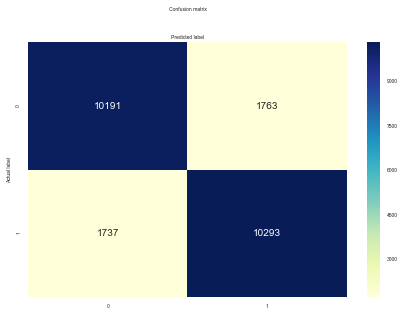

In [55]:
## I want to look at the breakdown of how many predictions the model got right and wrong.  For this I will use a 
## confusion matrix.

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [56]:
## Now looking at the accuracy of my model.  Since it is predicting classification I felt it best to use the 
## accuracy.score method to see the effectiveness of the model.  This model is better than the base line.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.854069379586


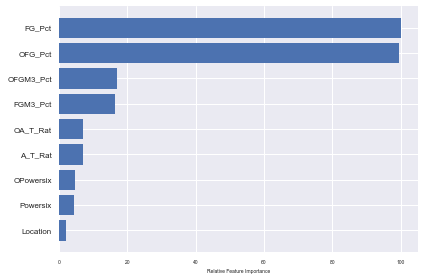

In [57]:
## Finding the importance of features using the coeffecients.  Most important Factors appear to be Field Goal %
## and 3PT % for both the team and the opposition.  Location is the least important factor.  That is good since
## March Madness is all on neutral courts.

feature_importance = abs(LR.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Creating a Dataframe to feed into LR model.

In [58]:
## I want the current 2019 stats for all teams.  Model will be predicted on the averages for the 2019 season.  

Team_Stats_2019 = Team_Stats[Team_Stats['Season']==2019]

Team_Stats_2019.head()

,School,Season,Wins,Losses,SRS,SOS,conf_wins,conf_losses,home_wins,home_losses,away_wins,away_losses,total_points,opponent_points,field_goals_made,field_goals_attempted,three_pt_fg_made,three_pt_fg_att,free_throws_made,free_throws_att,offensive_rebs,total_rebs,assists,turnovers,blocks,fouls,TeamID,ConfAbbrev,PowerSix
3117,Abilene Chr,2019,27,6,-1.28,-8.10,14.0,4.0,13,2,10,4,2458,2082,880,1858,246,637,452,632,322,1093,514,397,90,619,1101,southland,0
3118,Air Force,2019,14,18,-3.93,0.59,8.0,10.0,9,6,3,9,2179,2294,802,1777,234,712,341,503,253,1077,434,423,57,543,1102,mwc,0
3119,Akron,2019,17,16,5.21,1.44,8.0,10.0,14,3,1,10,2271,2107,797,1948,297,929,380,539,312,1204,399,388,106,569,1103,mac,0
3120,Alabama A&M,2019,5,27,-19.25,-8.40,4.0,14.0,4,7,0,18,1938,2285,736,1807,182,576,284,453,314,1025,384,487,49,587,1105,swac,0
3121,UAB,2019,20,14,0.82,-1.27,10.0,8.0,11,5,6,5,2392,2287,879,1938,227,675,407,607,353,1237,395,388,80,559,1412,cusa,0


In [59]:
## To give an example I will shose one game from the upcoming tournament.  Nevada vs Florida.  

Team1= Team_Stats_2019[Team_Stats_2019['School']=='Nevada']

In [60]:
Team2 = Team_Stats_2019[Team_Stats_2019['School']=='Florida']

In [61]:
## Creating a little dataframe just to get a view of what the vector will look like.

Data = [{'A_T_Rat': (Team1.iloc[0]['assists'])/(Team1.iloc[0]['turnovers']),
         'OA_T_Rat': (Team2.iloc[0]['assists'])/(Team2.iloc[0]['turnovers']),
         'Powersix': Team1.iloc[0]['PowerSix'], 
         'OPowersix': Team2.iloc[0]['PowerSix'],
         'FG_Pct': (Team1.iloc[0]['field_goals_made'])/(Team1.iloc[0]['field_goals_attempted']),
         'FGM3_Pct': (Team1.iloc[0]['three_pt_fg_made'])/(Team1.iloc[0]['three_pt_fg_att']),
         'OFG_Pct': (Team2.iloc[0]['field_goals_made'])/(Team2.iloc[0]['field_goals_attempted']),
         'OFGM3_Pct': (Team2.iloc[0]['three_pt_fg_made'])/(Team2.iloc[0]['three_pt_fg_att']),
         'Location': 0,'Team1':Team1.iloc[0]['School'], 'Team2':Team2.iloc[0]['School'] }]
Predict_MM = pd.DataFrame(Data)

In [62]:
Predict_MM.head()

,A_T_Rat,FGM3_Pct,FG_Pct,Location,OA_T_Rat,OFGM3_Pct,OFG_Pct,OPowersix,Powersix,Team1,Team2
0,1.461538,0.351384,0.465535,0,1.04,0.334541,0.426625,1,0,Nevada,Florida


In [63]:
## Predicting the Florida vs Nevada game based on the inputs.  Nevada has a 62.615135% chance of winning the game 
## and a 37.384865% chance of losing the game.

Xnew = [[Predict_MM.iloc[0]['A_T_Rat'],Predict_MM.iloc[0]['OA_T_Rat'],Predict_MM.iloc[0]['Powersix'],
         Predict_MM.iloc[0]['OPowersix'],Predict_MM.iloc[0]['FG_Pct'],Predict_MM.iloc[0]['FGM3_Pct'],
         Predict_MM.iloc[0]['OFG_Pct'],Predict_MM.iloc[0]['OFGM3_Pct'],Predict_MM.iloc[0]['Location']]]
ynew = LR.predict_proba(Xnew)
print(ynew)

[[ 0.37384865  0.62615135]]


In [64]:
## I want to show the % chance that team 1 will win

ynew1 = ynew[0]
print (f"{Predict_MM.iloc[0]['Team1']} has a {ynew1[1]*100} percent chance to beat {Predict_MM.iloc[0]['Team2']}")


Nevada has a 62.615134849643795 percent chance to beat Florida


In [65]:
## Based on this I would predict Team1 (Nevada) to win in my bracket.  But March Madness is fun/crazy/chaotic.  So I am going
## to use a little luck to give Team2 (Florida) a chance.

import random
madness_factor = random.randint(1,100)/100

In [66]:
## Since Nevada has a 62% chance to lose I am going to generate a random number.  If this number is below .62
## then Florida will lose.  If it is greater then Florida will win.  

if madness_factor <= ynew1[1]:
    print (madness_factor, f"is less than {ynew1[1]} so {Predict_MM.iloc[0]['Team1']} will beat {Predict_MM.iloc[0]['Team2']}")
else:
    print (madness_factor, f"is greater than {ynew1[1]} so {Predict_MM.iloc[0]['Team1']} will lose to {Predict_MM.iloc[0]['Team2']}")

0.81 is greater than 0.6261513484964379 so Nevada will lose to Florida
